# Part 3: Final Report
This section will cover: 
  - Background Research
  - Research Topic :  What are the GPA Trends of Universities in the United States?
  - Motivations
      - Subtopic 1: Are there signs of GPA Inflation at Virginia Tech
      - Subtopic 2: Are there signs of GPA Inflation at UVA 
      - Subtopic 3: Analyzing GPA Trends at Virginia Tech and UVA
          - Scatter Plot Linear regression Model
  - Addressing Possible Outliers
  - Findings 
  - Results 
  - How this affects you
  

# Background Research
- Looking at potential csv data
- Looking at various trends based using visualization
- Using this information to formulate a concrete research question

In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
%matplotlib inline 
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

**Displaying All GPA data**

This displays all of the average GPA values for each class, color coded by course number

While this chart is admittedly very dense (and thus hard to read) it does reveal a few things.
 - The first thing we can notice is that there is a smaller distribution of grades as the the level goes up (levels refer to 1000, 2000, 3000, etc).
 - In addition, as class level increases, we can see that the average GPA is much higher.
 - We can also see the density of data points decreases as the x-axis increases (with the exception of classes less than 1000)

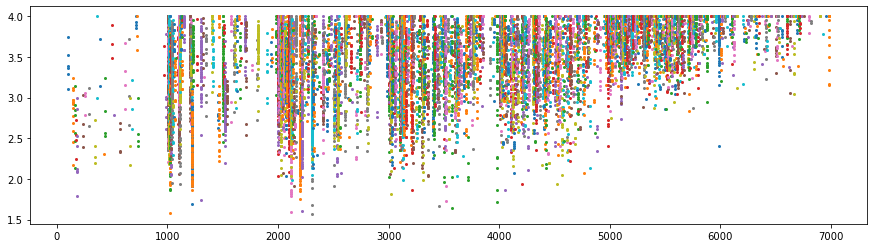

In [2]:
grades = pandas.read_csv('Data/fall-grade-distribution2018-2022.csv')
groups = grades.groupby('Course No.')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)
for name, group in groups:
    plt.plot(group["Course No."], group["GPA"], marker='o', linestyle='', markersize=2, label=name)

**Lets try to get some more readable data out of the set**

Here we are looking at the averages of all the GPA in course number catagories. 

We plot these averages out over a 4 years

There is a lot that can be observed here.

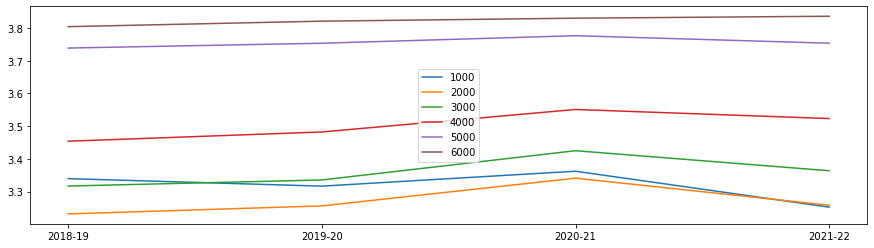

In [3]:

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)

# Groups ever 1***, 2****, 3****, etc classes together
for i in range (1,7):
    
    start = i * 1000
    end = (i + 1) * 1000
    
    level_df = grades.loc[grades['Course No.'] >= start] 
    level_df = level_df.loc[grades['Course No.'] < end]
    
    # groups the years together and finds the averages from each of the 4 years
    sub_groups = level_df.groupby('Academic Year')
    
    means =[]
    years = []

    for sub_name, sub_group in sub_groups:
        gpa_averages = sub_group["GPA"].mean()
        means.append(gpa_averages)
        years.append(sub_name)

    # Plots all averages for each year
    plt.plot(years, means, linestyle='solid', markersize=2, label=start)

plt.legend()

**In depth look at 3 difficult classes and there grades over time**

There is a lot of interesting things happening in this chart

We can add more notoriously difficult classes too.

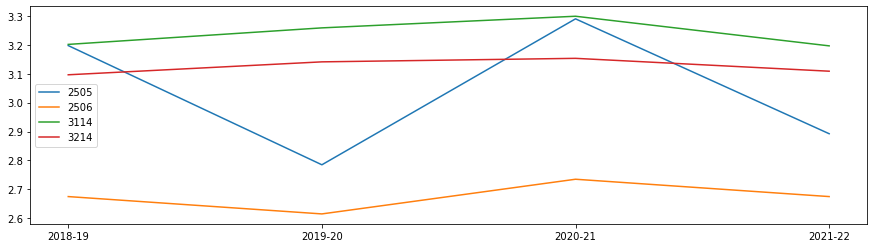

In [4]:

groups = grades.groupby('Course No.')
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)
for name, group in groups:
    if name in [3214, 2505, 2506,3114]:
        sub_groups = group.groupby('Academic Year')

        means =[]
        years = []
        
        for sub_name, sub_group in sub_groups:
            gpa_averages = sub_group["GPA"].mean()
            means.append(gpa_averages)
            years.append(sub_name)
        plt.plot(years, means, linestyle='solid', markersize=2, label=name)

plt.legend()

**Some other Ideas to look at**
- Average GPA for each professor (could be a bar graph)
- Grade distribution from year to year
- Look at a single year and graph different professors average GPA
- Maybe a box plot of grades too

# Research Question 1 : 
# What are the GPA Trends of Universities in the United States?

###  Motivation
Grade inflation is an undeniable reality of the US educational system, as over the past couple of decades, GPA for the same courses in bachelor level degrees have risen. However, in order to determine whether or not this issue is overblown, we want to investigate how much it has truly gone up by taking a look at universities located in Virginia, particularly that of Virginia Tech as well as the University of Virginia. 

## Figure 1
![Image of GPA Inflation for Public and Private Schools](https://www.gradeinflation.com/figure1.png)

#### Source: https://www.gradeinflation.com/

## Figure 2
![Image of GPA Inflation for Public and Private Schools](https://www.gradeinflation.com/figure2.png)
#### Source: https://www.gradeinflation.com/

# ------------------------------------------------------------------
## Subtopic 1: Are there signs of GPA Inflation at Virginia Tech
# ------------------------------------------------------------------

## Hypothesis
There is grade inflation at Virginia Tech

### Procedure
1. Get CSV data for grade distribution of classes (Fall, Spring, Summer and Winter) at VT from 2012 to 2022 
2. Plot the trend of GPAs
3. Form a conclusion based on the data and visualizations

#### Step 1: Obtaining the Data

In [5]:
All_Grades_Since2012 = pandas.read_csv('Data/All_Grade_Distributions.csv')
df = All_Grades_Since2012.groupby(["Academic Year", "Term","Subject","Course No." ])['GPA',
 'A (%)',
 'A- (%)',
 'B+ (%)',
 'B (%)',
 'B- (%)',
 'C+ (%)',
 'C (%)',
 'C- (%)',
 'D+ (%)',
 'D (%)',
 'D- (%)',
 'F (%)'].mean()
df

/tmp/ipykernel_166126/2655820809.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = All_Grades_Since2012.groupby(["Academic Year", "Term","Subject","Course No." ])['GPA',


GPA  A (%)  A- (%)  B+ (%)  \
Academic Year Term     Subject Course No.                                 
2012-13       Fall     AAEC    1005        2.490   15.7    7.55    6.85   
                               1006        2.820   12.2   15.60   15.60   
                               2104        3.390   54.8    0.00    0.00   
                               2434        2.780   10.7   10.70   10.70   
                               2464        2.705    2.4   16.45   19.40   
...                                          ...    ...     ...     ...   
2022-23       Summer I TA      3954        4.000  100.0    0.00    0.00   
                       UAP     3954        4.000  100.0    0.00    0.00   
                               5184        4.000  100.0    0.00    0.00   
                       WGS     1824        3.260   55.6   11.10   11.10   
                               2204        2.540   20.0   20.00    0.00   

                                           B (%)  B- (%)  C+ (%)  C (%)  \
Academic Year Term     Subject Course No.                                 
2012-13       Fall     AAEC    1005        17.30    5.90     9.1  13.15   
                               1006        16.30    9.50     6.8   6.10   
                               2104        33.70    0.00     0.0   8.40   
                               2434        19.60   16.10     7.1  12.50   
                               2464        13.85   17.85     9.1   0.80   
...                                          ...     ...     ...    ...   
2022-23       Summer I TA      3954         0.00    0.00     0.0   0.00   
                       UAP     3954         0.00    0.00     0.0   0.00   
                               5184         0.00    0.00     0.0   0.00   
                       WGS     1824         0.00    0.00    11.1   0.00   
                               2204         0.00   20.00    20.0   0.00   

                                           C- (%)  D+ (%)  D (%)  D- (%)  \
Academic Year Term     Subject Course No.                                  
2012-13       Fall     AAEC    1005          5.45     4.5    4.5     1.9   
                               1006          8.20     4.1    0.7     2.0   
                               2104          0.00     0.0    1.8     0.0   
                               2434          5.40     1.8    3.6     1.8   
                               2464          3.95    11.5    0.8     1.6   
...                                           ...     ...    ...     ...   
2022-23       Summer I TA      3954          0.00     0.0    0.0     0.0   
                       UAP     3954          0.00     0.0    0.0     0.0   
                               5184          0.00     0.0    0.0     0.0   
                       WGS     1824          0.00     0.0    0.0     0.0   
                               2204          0.00     0.0    0.0     0.0   

                                           F (%)  
Academic Year Term     Subject Course No.         
2012-13       Fall     AAEC    1005          8.2  
                               1006          2.7  
                               2104          1.2  
                               2434          0.0  
                               2464          2.4  
...                                          ...  
2022-23       Summer I TA      3954          0.0  
                       UAP     3954          0.0  
                               5184          0.0  
                       WGS     1824         11.1  
                               2204         20.0  

[47972 rows x 13 columns]

In [6]:
dfGPABySemester= df.groupby(["Academic Year" ])['GPA'].mean()

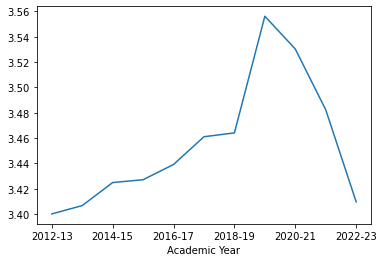

In [7]:
plt= dfGPABySemester.plot.line()

#### Step 2: Data Trend Visualization

All Departments regression slope = [0.00273992]


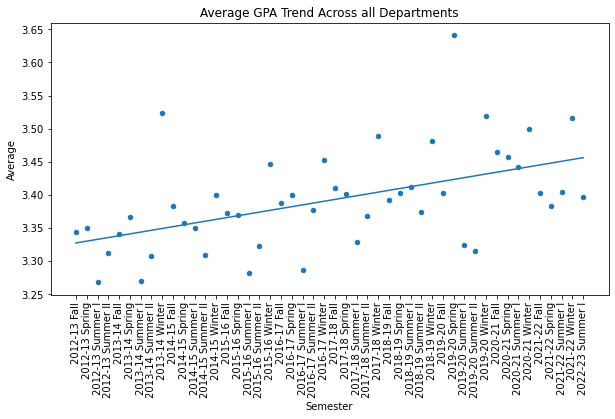

In [8]:
# All Departments
group_by_semester = All_Grades_Since2012.groupby(['Academic Year', 'Term'])

# averages per semester
names = list()
averages = list()
for name, group in group_by_semester:
    names.append('%s %s'%(name[0], name[1]))
    averages.append(numpy.mean(group['GPA']))
    
semester_averages = [(names[i], averages[i]) for i in range(0, len(names))]
df_semester_averages = pandas.DataFrame(semester_averages, columns=['Semester','Average'])

# linear regression
size = len(averages)
np_indexes = numpy.array(range(0, size))
np_averages = numpy.array(averages)
lm = linear_regressor.fit(np_indexes.reshape(size, 1), np_averages.reshape(size, 1))
df_semester_averages['Predicted'] = lm.predict(np_indexes.reshape(size, 1))
print('All Departments regression slope =', lm.coef_[0])

# plotting
obj_AllDepts = df_semester_averages.plot.scatter(
    title='Average GPA Trend Across all Departments',
y='Average', x='Semester', figsize=(10,5), sharex=False, rot=90)

line = matplotlib.lines.Line2D(np_indexes, df_semester_averages['Predicted'])
obj_AllDepts.add_line(line)



CS Department regression slope = [0.00865898]


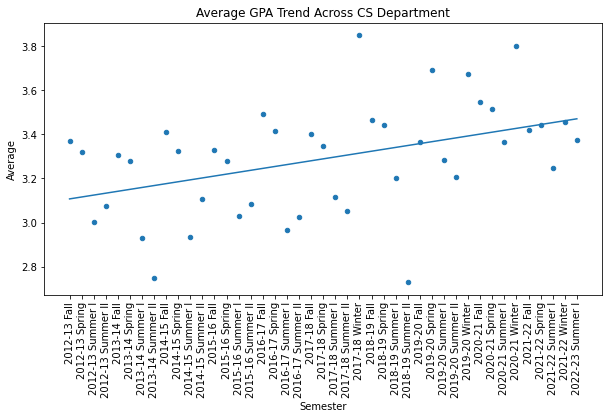

In [9]:
# CS Department
CS_Grades_Since2012 = All_Grades_Since2012[All_Grades_Since2012['Subject']=='CS']
group_by_semester = CS_Grades_Since2012.groupby(['Academic Year', 'Term'])

# averages per semester
names = list()
averages = list()
for name, group in group_by_semester:
    names.append('%s %s'%(name[0], name[1]))
    averages.append(numpy.mean(group['GPA']))
    
semester_averages = [(names[i], averages[i]) for i in range(0, len(names))]
df_semester_averages = pandas.DataFrame(semester_averages, columns=['Semester','Average'])

# linear regression
size = len(averages)
np_indexes = numpy.array(range(0, size))
np_averages = numpy.array(averages)
lm = linear_regressor.fit(np_indexes.reshape(size, 1), np_averages.reshape(size, 1))
df_semester_averages['Predicted'] = lm.predict(np_indexes.reshape(size, 1))
print('CS Department regression slope =', lm.coef_[0])

# plotting
obj_CS = df_semester_averages.plot.scatter(
    title='Average GPA Trend Across CS Department',
y='Average', x='Semester', figsize=(10,5), sharex=False, rot=90)

line = matplotlib.lines.Line2D(np_indexes, df_semester_averages['Predicted'])
obj_CS.add_line(line)

#### Step 3: Conclusion 
After performing linear regression to fit a line to the average GPA of each semester over the last decade, we can see that there is a upwards trend across all of the courses at Virginia Tech. It should be noted that there a few outliers, particularly  Winter during the 2012-2013 Academic Year, and Spring during the 2019-2020 Academic Year. While we cannot find an explanation for the Winter semester (none of those working on the project were Virginia Tech students during that time, and very little information is available investigating this matter), we know that the Spring semester was during the era of virtual learning caused by the COVID-19 virus. Subsequently, it is possible that this may have partially caused the grade average to become inflated, as during this time, it was very difficult for professors to hold students accountable for cheating.

In addition, another notable finding is that when filtering the course data to only include the CS department, there is a larger upwards trend than the all department one. While the all department trend went from around 3.25 to 3.45 (a .2 increase), the CS department went from 3.1 to 3.45 (a .35 increase). Thus, when compared to the average department at Virginia Tech, this division seemingly has higher grade inflation than the rest. 

Ultimately, we can conclude that there is grade inflation at Virginia Tech, with some areas such as the CS department having a higher rate than others. A further question that can then be formulated from this: how does Virginia Tech's grade inflation compare to that of other schools in the US?

# ---------------------------------------------------
## Subtopic 2: Are there signs of GPA inflation at UVA
# ---------------------------------------------------


### Hypothesis
There is grade inflation at UVA. 
### Procedure
1. Scrape data from UVA's University GPA Records
2. Plot the trend of GPAs
3. Form a conclusion based on the data and visualizations

In [10]:
UVA_Grade_Distribution = pandas.read_csv('Data/spring-UVA-gradeDistribution.csv')
UVA_Grade_Distribution = UVA_Grade_Distribution.sort_values(by="Spring")
UVA_Grade_Distribution

,Spring,Architecture,Arts and Science,Commerce,Education,Engineering,Leadership and Public Policy,Nursing,Overall
25,1996,3.16,3.13,3.29,3.27,2.92,NaN,3.26,3.12
24,1997,3.16,3.12,3.32,3.28,2.94,NaN,3.26,3.12
23,1998,3.18,3.12,3.41,3.38,2.97,NaN,3.26,3.12
22,1999,3.19,3.12,3.43,3.38,2.99,NaN,3.28,3.13
21,2000,3.18,3.13,3.42,3.28,3.01,NaN,3.30,3.14
20,2001,3.22,3.13,3.43,3.25,3.02,NaN,3.28,3.14
19,2002,3.24,3.13,3.42,3.25,3.03,NaN,3.27,3.14
18,2003,3.22,3.14,3.41,3.21,3.03,NaN,3.31,3.15
17,2004,3.24,3.14,3.46,3.14,3.06,NaN,3.34,3.16
16,2005,3.23,3.17,3.47,3.12,3.07,NaN,3.37,3.18


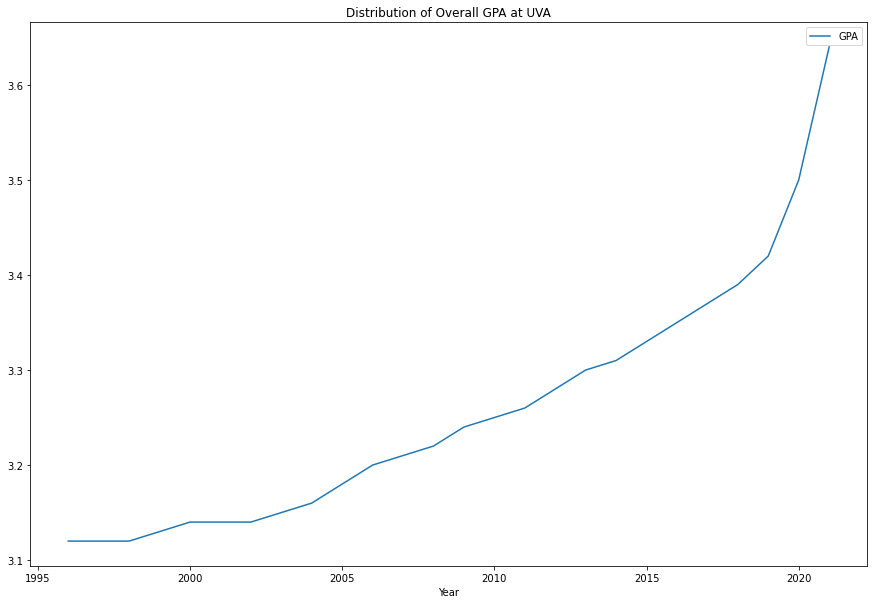

In [11]:
year = UVA_Grade_Distribution["Spring"]
mean = UVA_Grade_Distribution["Overall"]
df_UVA1 = pandas.DataFrame({'Year': UVA_Grade_Distribution["Spring"], 'GPA': UVA_Grade_Distribution["Overall"]})
uvaP1=df_UVA1.plot(x="Year",title="Distribution of Overall GPA at UVA", figsize=(15,10))

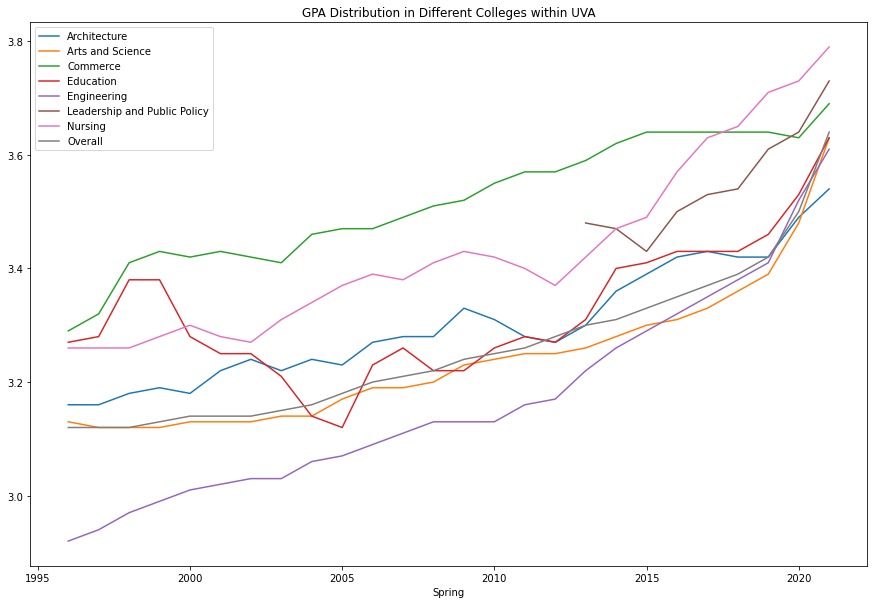

In [12]:
# Plot 2 for UVA
# # plt.figure()
# year = UVA_Grade_Distribution["Spring"]
# mean = UVA_Grade_Distribution["Architecture"]
# for i in range(1,9):
#     department_data = UVA_Grade_Distribution.iloc[:, i:i+1]
#     department_name = department_data.columns[0]
#     plt.plot(year, department_data, linestyle='solid', markersize=2, label=department_name)
uvaP2=UVA_Grade_Distribution.plot(x="Spring", figsize=(15,10), title="GPA Distribution in Different Colleges within UVA")

In [13]:
df_stats = pandas.DataFrame(columns=["Colleges","Min","Max","Average","MaxDiff"])
df_stats["Colleges"] = UVA_Grade_Distribution.columns[1:]
for i in range(1,df_stats["Colleges"].size+1):
    df_stats["Min"][i-1]= (UVA_Grade_Distribution.iloc[:,i]).min()
    df_stats["Max"][i-1]= (UVA_Grade_Distribution.iloc[:,i]).max()
    df_stats["Average"][i-1]= (UVA_Grade_Distribution.iloc[:,i]).mean()
    df_stats["MaxDiff"][i-1]= (UVA_Grade_Distribution.iloc[:,i]).max()-(UVA_Grade_Distribution.iloc[:,i]).min()
    
df_stats


,Colleges,Min,Max,Average,MaxDiff
0,Architecture,3.16,3.54,3.300385,0.38
1,Arts and Science,3.12,3.63,3.239231,0.51
2,Commerce,3.29,3.69,3.518077,0.4
3,Education,3.12,3.63,3.320385,0.51
4,Engineering,2.92,3.61,3.166154,0.69
5,Leadership and Public Policy,3.43,3.73,3.547778,0.3
6,Nursing,3.26,3.79,3.430385,0.53
7,Overall,3.12,3.64,3.256538,0.52


<AxesSubplot:title={'center':'Quantitative Statistics of UVA GPA Distribution in Respective Colleges'}, xlabel='Colleges'>

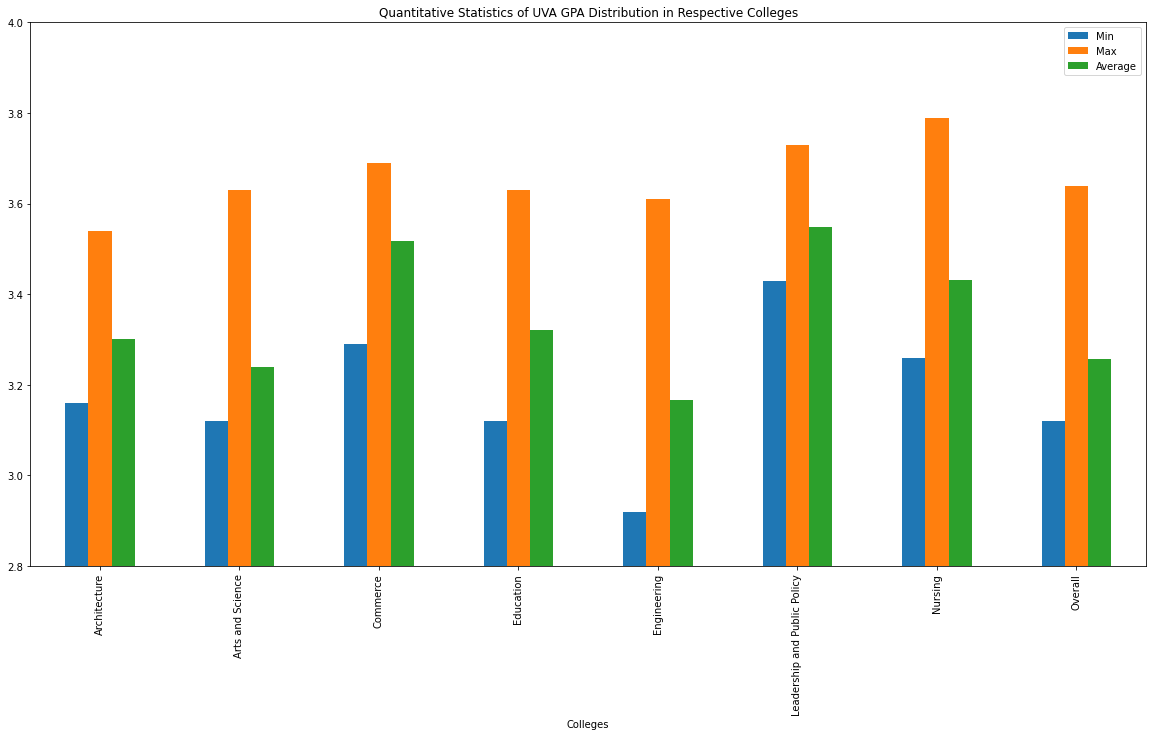

In [14]:
UVA_Stats=df_stats.plot(x="Colleges", y=["Min", "Max", "Average"], kind="bar",ylim=(2.8,4),figsize=(20,10), title
                        ="Quantitative Statistics of UVA GPA Distribution in Respective Colleges")
UVA_Stats

<AxesSubplot:title={'center':'Maximum Difference of UVA GPA Distribution in Respective Colleges'}, xlabel='Colleges'>

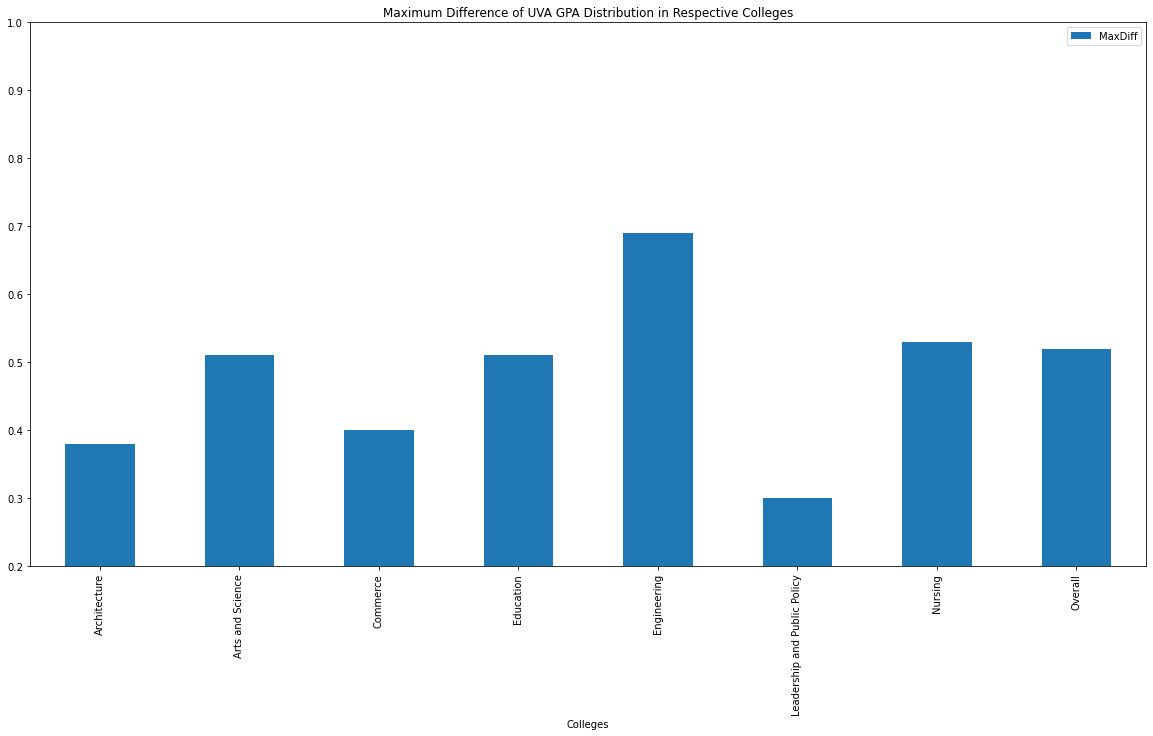

In [15]:
UVA_Stats_diff= df_stats.plot(x="Colleges", y=["MaxDiff"], kind="bar",ylim=(0.2,1),figsize=(20,10), title
                        ="Maximum Difference of UVA GPA Distribution in Respective Colleges")
UVA_Stats_diff

#### Step 3: Conclusion 

Note, UVA's GPA data starts from year, 1995. With additional data, it is easier to see the drastic changes in the trends of GPA for the past 26 years. 
- The First GPA Distribution plot resembles a exponential curve. This shows that over the past decade, overall GPA has risen at UVA.
- The Second GPA Distribution plot shows the GPA change of different Colleges within UVA. At first glance, The Engineering department has overgone the greatest change.
- The Third Plot shows the quantitative data points, Nursing having the largest GPA among the colleges and Engineering having the smallest GPA. 
- The Fourth Plot further shows how the College of Engineering has the largest MaxDiff. 
   - Note: The data avaliable for Leadership and Public Policy is from 2013 to 2021, which is why it is an outlier

# ------------------------------------------------------------
## Subtopic 3 : Analyzing GPA Trends at Virginia Tech and UVA
# ------------------------------------------------------------

### Hypothesis
There is grade inflation at VT and UVA. We expect UVA to have a lower linear regression slope.
### Procedure
1. Use the scraped dataframes for UVA and VT. 
2. Prepare the UVA data, Prepare the VT data
3. Plot the trend of GPAs
4. Linear Regression of both scatterplots
5. Form a conclusion based on the data and visualizations

In [16]:
df_VT_Spring = All_Grades_Since2012.loc[All_Grades_Since2012['Term'] == "Spring"]

In [17]:
UVA_Grade_Distribution = pandas.read_csv('Data/spring-UVA-gradeDistribution.csv')
df_UVA = pandas.DataFrame({'Year': UVA_Grade_Distribution.iloc[0:10,0], 'GPA': UVA_Grade_Distribution.iloc[0:10,8]})
df_UVA=df_UVA.sort_values(by="Year")
df_UVA =df_UVA.iloc[1:10]

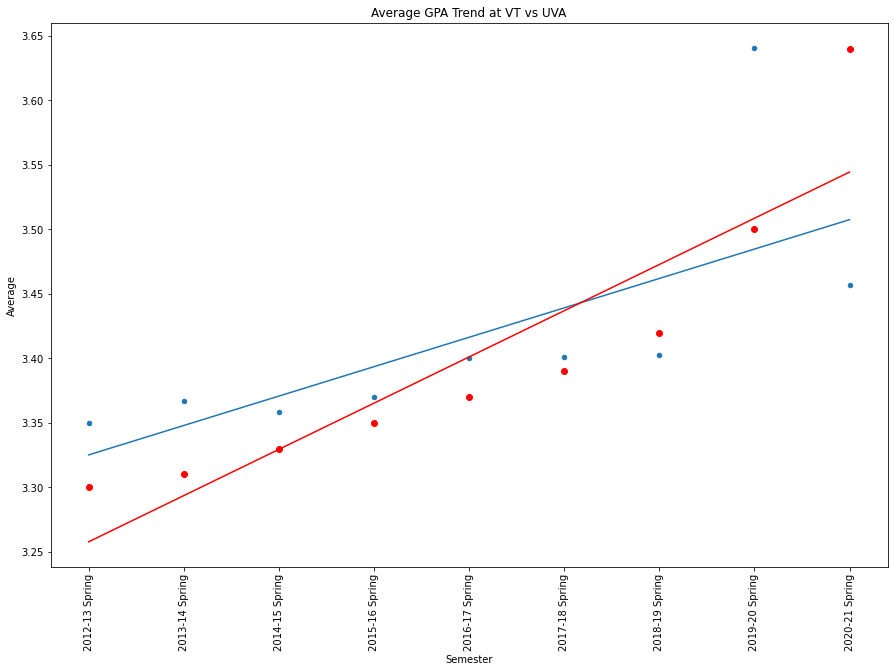

In [18]:
# All Departments
group_by_semester = df_VT_Spring.groupby(['Academic Year', 'Term'])

group_by_semester.describe()
# averages per semester
names_VT = list()
averages_VT = list()

for n, g in group_by_semester:
    names_VT.append('%s %s'%(n[0], n[1]))
    averages_VT.append(numpy.mean(g['GPA']))
names_VT=names_VT[:9]
averages_VT=averages_VT[:9]
    
semester_averages_Spring = [(names_VT[i], averages_VT[i]) for i in range(0, len(names_VT))]
semester_averages_Spring
df_semester_averages_Spring = pandas.DataFrame(semester_averages_Spring, columns=['Semester','Average'])
df_semester_averages_Spring

# linear regression VT
size = len(averages_VT)
np_indexes_VT = numpy.array(range(0, size))
np_averages_VT = numpy.array(averages_VT)
lm_VT = linear_regressor.fit(np_indexes_VT.reshape(size, 1), np_averages_VT.reshape(size, 1))
df_semester_averages_Spring['Predicted'] = lm_VT.predict(np_indexes_VT.reshape(size, 1))
VT_Slope= lm_VT.coef_[0]

# # plotting VT



obj2 = df_semester_averages_Spring.plot.scatter(
    title='Average GPA Trend at VT vs UVA',
y='Average', x='Semester', figsize=(15,10), sharex=False, rot=90, picker=True)

line_VT = matplotlib.lines.Line2D(np_indexes_VT, df_semester_averages_Spring['Predicted'])
obj2.add_line(line_VT)


# # linear regression VT
size_UVA = len(df_UVA["GPA"])
np_indexes_UVA = numpy.array(range(0, size_UVA))
np_averages_UVA = numpy.array(df_UVA["GPA"])
lm_UVA = linear_regressor.fit(np_indexes_UVA.reshape(size, 1), np_averages_UVA.reshape(size, 1))
df_UVA['Predicted'] = lm_UVA.predict(np_indexes_UVA.reshape(size_UVA, 1))
UVA_Slope= lm_VT.coef_[0]


# # plotting UVA
df_UVA
obj2.scatter(df_semester_averages_Spring.iloc[:,0],df_UVA.iloc[:,1],c='red')


line_UVA = matplotlib.lines.Line2D(np_indexes_UVA, df_UVA['Predicted'], c='red')
obj2.add_line(line_UVA)


<AxesSubplot:title={'center':'Qualitative analysis of VT and UVA Overall GPA'}, xlabel='Name'>

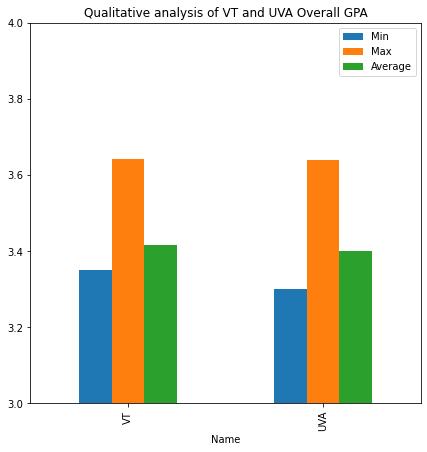

In [19]:
df_Bars =pandas.DataFrame({'Name': ['VT', 'UVA'],'Min': [min(averages_VT), df_UVA["GPA"].min()],'Max': [max(averages_VT), df_UVA["GPA"].max()],'Average': [(sum(averages_VT)/len(averages_VT)), df_UVA["GPA"].mean()],
    'Slope' : [VT_Slope[0], UVA_Slope[0]]})
stats=df_Bars.plot(x="Name", y=["Min", "Max", "Average"], kind="bar", ylim=(3,4), figsize=(7,7), title="Qualitative analysis of VT and UVA Overall GPA")
stats

In [20]:
df_Bars

,Name,Min,Max,Average,Slope
0,VT,3.35019,3.640879,3.416355,0.022795
1,UVA,3.30000,3.640000,3.401111,0.035833


VT Linear Regression Slope:  0.02279457445345036
UVA Linear Regression Slope:  0.035833333333333356
Difference:  0.013038758879882997


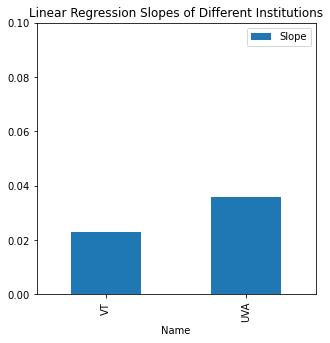

In [21]:
stats_slope = df_Bars.plot(x="Name", y=["Slope"], kind="bar", ylim=(0,0.10), figsize=(5,5), title="Linear Regression Slopes of Different Institutions")
stats_slope
print("VT Linear Regression Slope: ",df_Bars["Slope"][0] )
print("UVA Linear Regression Slope: ",df_Bars["Slope"][1] )
print("Difference: ",df_Bars["Slope"][1]-df_Bars["Slope"][0] )

In [22]:
df_UVA

,Year,GPA,Predicted
8,2013,3.30,3.257778
7,2014,3.31,3.293611
6,2015,3.33,3.329444
5,2016,3.35,3.365278
4,2017,3.37,3.401111
3,2018,3.39,3.436944
2,2019,3.42,3.472778
1,2020,3.50,3.508611
0,2021,3.64,3.544444


#### Step 3: Conclusion 
After performing linear regression to fit a line to the average GPA of each semester over the last decade, we can see that there is a upwards trend across all of the courses at Virginia Tech and average GPAs of all departments at UVA.

Initially, we assumed that because the UVA was ranked higher in Academics and had a lower minimum, maximum and average GPA, it would have a smaller regression curve. However, its is noticable that after Spring 2019-2020's spike, Virginia Tech's GPA the next year decreased while UVA's GPA continued to increase. 

From this, we can conclude that there is grade inflation at Virginia Tech and UVA. While our findings suggest that while VT's GPA is normalizing after an online-only year, UVA's GPA only rose higher. Thus, our expectation is that GPA at UVA is expected to decrease over time to a smaller slope.

# ------------------------------------------------------------
## Addressing Possible Outliers
# ------------------------------------------------------------

In [23]:
combinedGPAResults = pandas.DataFrame({'VT': averages_VT, 'UVA':df_UVA["GPA"] })

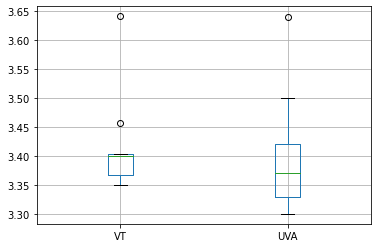

In [24]:
BoxPlot= combinedGPAResults.boxplot()

In [25]:
combinedGPAResults["Year"]=df_UVA["Year"]
combinedGPAResults

,VT,UVA,Year
8,3.350190,3.30,2013
7,3.367297,3.31,2014
6,3.358362,3.33,2015
5,3.369995,3.35,2016
4,3.400029,3.37,2017
3,3.400710,3.39,2018
2,3.402611,3.42,2019
1,3.640879,3.50,2020
0,3.457119,3.64,2021


### Conclusion
There are two outliers in VT's distribution and one outlier in UVA's distrubution

As you can see,
- The two large outliers for VT are the first two years affected by Covid-19 (2019-2020,2020-2021)
- The large outlier for UVA is 2020-2021, the year which was fully online

Additionally
- the range of middle 50% of GPAs across the past 9 years for UVA is much larger than VT, as the UVA data is more spread out
- the range of middle 50% of GPAs across the past 9 years for VT is much smaller than UVA, as the VT data is less spread out
- If we do not consider outliers, UVA has a higher maximum GPA than VT

These trends show that GPA at Virginia Tech reached a peak in Spring 2019-2020, but has seemingly fallen down and normalized since then. Meanwhile, since the GPA of 2020-2021 Spring at UVA is at the highest it has been in 10 years, we expect that the next school year GPA for UVA will stay the same or even lower than continuing the upward trend.

# ------------------------------------------------------------
## Findings & Results
# ------------------------------------------------------------

## Subtopic 1

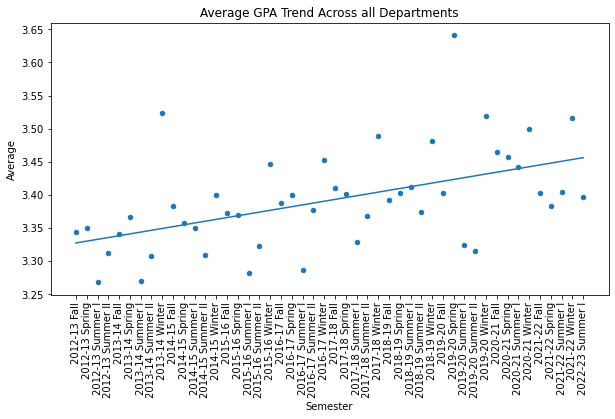

In [26]:
obj_AllDepts.get_figure()

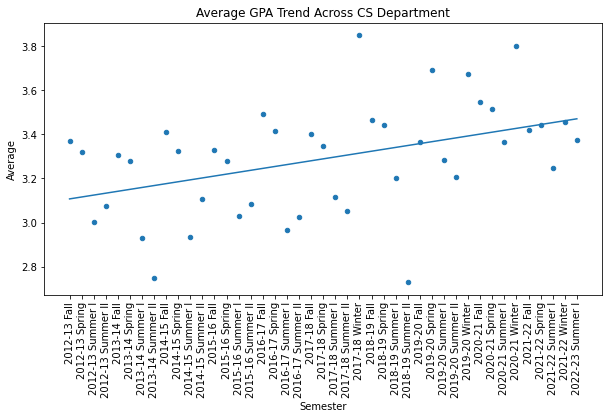

In [27]:
obj_CS.get_figure()

## Subtopic 2

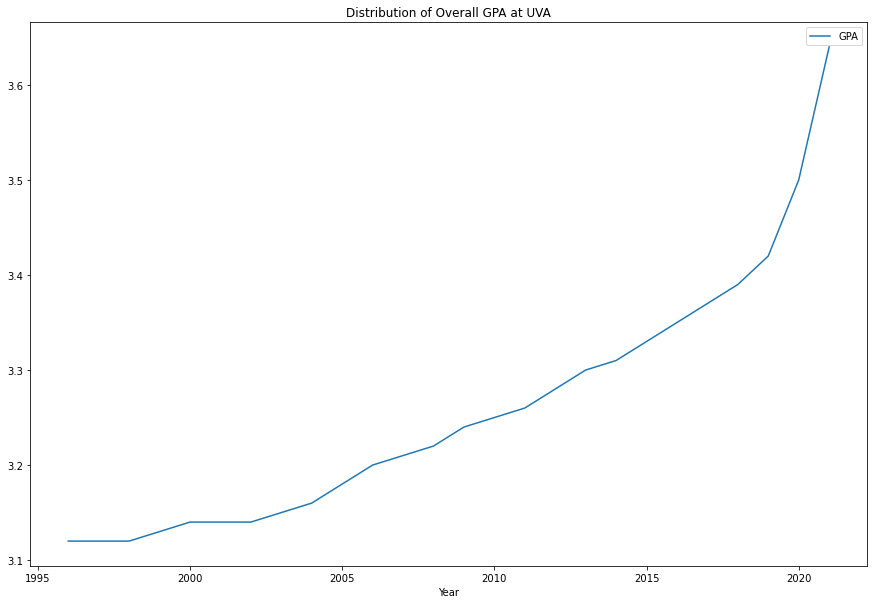

In [28]:
uvaP1.get_figure()

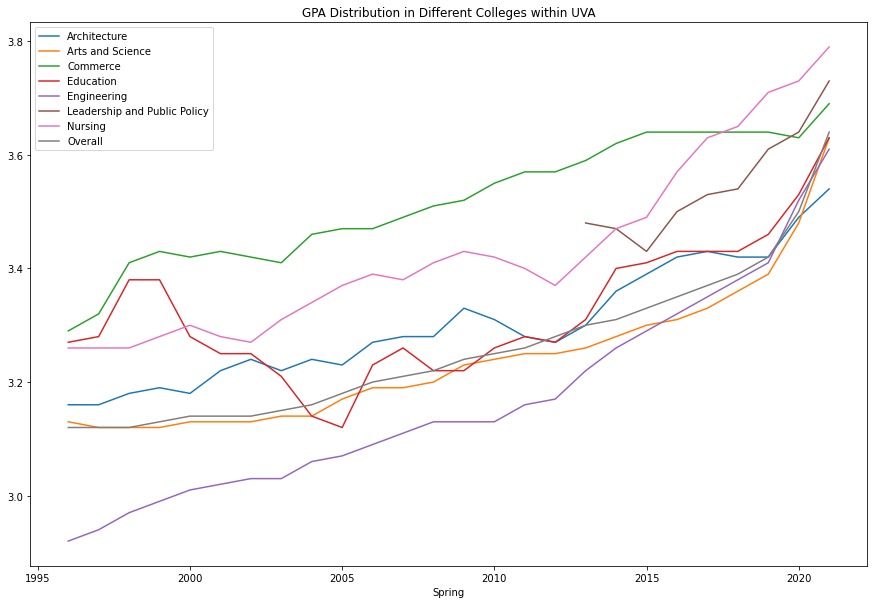

In [29]:
uvaP2.get_figure()

## Subtopic 3

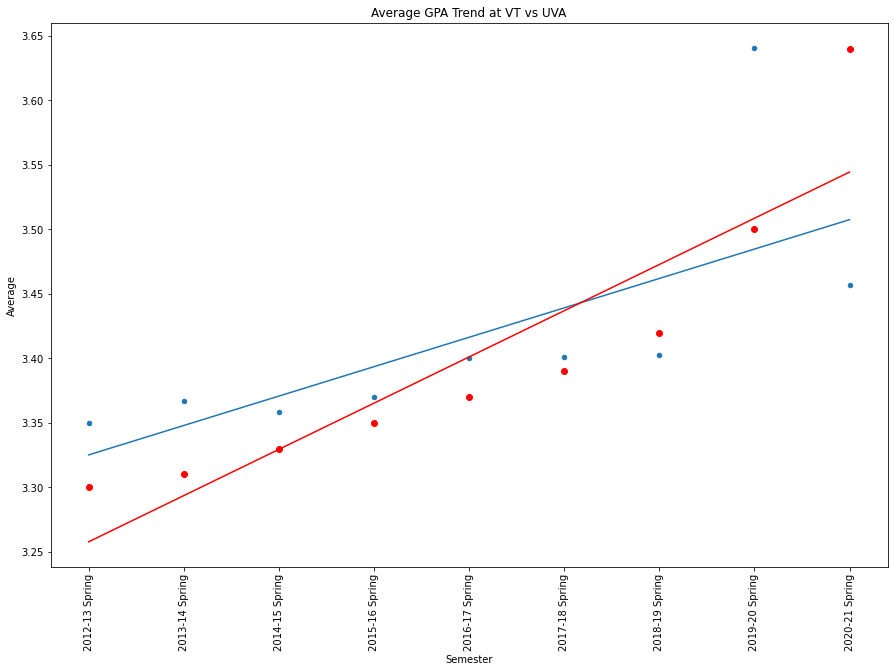

In [30]:
obj2.get_figure()

# ------------------------------------------------------------
## Why is this important to you?
# ------------------------------------------------------------

According to the National Assessment of Educational Progress released in March, high school graduates earned an average 3.11 GPA in 2019, up from 3.00 in 2009 and 2.68 in 1990.

However, average ACT and SAT scores have not shown any noticible fluctuation.

Thus, GPA Inflation is real. Here are some ways this can impact the average student:

1. The value of the letter 'A' grade does no longer holds the same weight. 
2. You will be more focused on getting the grade rather than learning the material

Systemically, this is wrong.

GPA inflation is just as prominant in high schools, as colleges assess student GPA as one way to determine which students get accepted. However, this can be unfair since some high schools experience more GPA inflation than others. Similarly, hiring teams for careers as well as graduate schools will also use student GPA as a benchmark, albeit from college students instead. They need to consider that classes at one university might be much harder than another, despite the same material being taught in both of them. As such, candidates with the same degree from different institutions need to be carefully selected beyond just GPA, and other aspects such as internship/career experience as well as extracurricular work should be assessed as well.

# ------------------------------------------------------------
## Other Research Questions to Explore in the future
# ------------------------------------------------------------

### 1. Comparing the average grades / highs and lows of College of Engineering (CS) vs College of Business (BIT)

##### Prereq: 
1. CSV data for CS classes from 2012 to 2022
2. CSV data for BIT classes from 2012 to 2022

##### Hypothesis: 
College of Business would have a higher grade average than the College of Engineering

##### Procedure: 
1. Obtain the data of classes
2. Plot the distribution of A, B, C and Ds for 4 core BIT classes (BIT 2405, BIT 2406, BIT 3414, BIT 3424)
3. Plot the distribution of A, B, C and Ds for 4 core CS classes (CS 2505, CS 2506, CS 3114, CS 3214)
4. Make a conclusion based on the visualization and data



### 2. Comparing the average grades / highs and lows of College of Engineering (CS) vs College of Science (BIT)

##### Prereq: 
1. CSV data for CS classes from 2012 to 2022
2. CSV data for BIT classes from 2012 to 2022

##### Hypothesis: 
College of Business would have a higher grade average than the College of Engineering

##### Procedure: 
1. Obtain the data of classes
2. Plot the distribution of A, B, C and Ds for 4 core BIT classes (BIT 2405, BIT 2406, BIT 3414, BIT 3424)
3. Plot the distribution of A, B, C and Ds for 4 core CS classes (CS 2505, CS 2506, CS 3114, CS 3214)
4. Make a conclusion based on the visualization and data



### 3. Comparing grades of the same CS class between different professors
Question specifics to be added in later parts of the project

### 4. Comparing Virginia Tech's Distribution against other universitys
Question specifics to be added in later parts of the project


# ------------------------------------------------------------
## Changes Since Part 2
# ------------------------------------------------------------

#### 1. We looked at UVA GPA Distributions
- Overall GPA Trends
- College GPA Trends 
- Qualitative Statistics of College GPA
- MaxDifference in College GPA

#### 2. We then compared the VT and UVA data and created a scatterplot
- Combined ScatterPlot
- Linear Regression Line for VT and UVA
- Qualitative Statistics of Institution GPA
- Analyzing slopes of both Institutions

#### 3. We addressed possible outliers
- Boxplot

#### 4. We added context to our research problem
- Why people should care about it
- How it is currently affecting people today
- How they could be impacted by this

#### 5. Added Questions to look at in the future
- Added our previous research questions to the list

#### 6. Added various other visuals for background knowledge

# Part 3 Contributions

1. Henry Macht : Plotted inital graphs and observations of data, Worked on graphing and analyzing GPA data for UVA data (Subtopic 2) as well and VT data (Background Research).
2. Prayash Joshi: Qualitative Statistics, subtopic 3, Outliers, Why it is important summary
3. Ivan Estay : Outliers, cleaning up grammatical and spelling errors
4. Matthew Grillo : Data Transformations and Regression Analysis
5. Christopher Parker: ...